In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
!tar -zxvf ../jupyters_and_slides/2018-autumn/80k.tar.gz

x 80k_articles.txt


In [3]:
!ls

10k_articles.txt Class_1          README.md
80k_articles.txt Class_2.ipynb    Untitled.ipynb


In [4]:
all_string = open("80k_articles.txt").read()

In [5]:
len(all_string)

34475997

In [30]:
all_string[:100]

'新华社照片，东莞（广东），2017年4月7日\\n（体育）（9）篮球——CBA总决赛第四场：广东对阵新疆\\n4月7日，广东东莞银行队球员易建联在比赛中扣篮。\\n当日，在2016-2017赛季中国男子篮球'

In [31]:
def tokenize(string):
    string = string.replace(u'\\n', u'')
    return "".join(re.findall('[\w|\d]+', string))

In [32]:
ALL_CHARACTER = tokenize(all_string)

In [33]:
len(ALL_CHARACTER)

29136396

In [34]:
ALL_CHARACTER[:100]

'新华社照片东莞广东2017年4月7日体育9篮球CBA总决赛第四场广东对阵新疆4月7日广东东莞银行队球员易建联在比赛中扣篮当日在20162017赛季中国男子篮球职业联赛CBA总决赛第四场比赛中广东东莞银'

In [29]:
all_string.replace(u'\\n', u'')[:100]

'新华社照片，东莞（广东），2017年4月7日（体育）（9）篮球——CBA总决赛第四场：广东对阵新疆4月7日，广东东莞银行队球员易建联在比赛中扣篮。当日，在2016-2017赛季中国男子篮球职业联赛（C'

In [35]:
from collections import Counter

In [36]:
all_character_counts = Counter(ALL_CHARACTER)

In [37]:
all_character_counts.most_common()[:10]

[('的', 635684),
 ('国', 303683),
 ('1', 285430),
 ('在', 273451),
 ('一', 255874),
 ('中', 249541),
 ('日', 248419),
 ('2', 247140),
 ('新', 243975),
 ('0', 240159)]

In [44]:
M = all_character_counts.most_common()[0][1]
M

635684

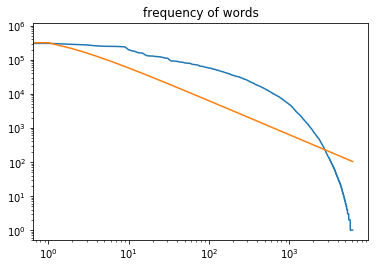

In [48]:
from matplotlib.pyplot import xscale, yscale, title, plot
yscale("log"); xscale("log"); title("frequency of words")
plot([c for (w, c) in all_character_counts.most_common()])
plot([M/i for i in range(1, len(all_character_counts)+1)])

In [49]:
type(all_character_counts)

collections.Counter

In [80]:
all_character_counts["💃"]

0

In [82]:
a = 1
"yes" if a == 1 else "No"

'yes'

In [138]:
def get_prob_func(counter):
    total_frequency = sum(counter.values())
    #min_frequency = min(counter.values())
    def get_prob1(item):
        #return counter[item]/total_frequency if counter[item] != 0 else min_frequency/total_frequency
        return counter[item]/total_frequency
    return get_prob1

get_prob1 = get_prob_func(all_character_counts)
def get_prob2(item):
    return all_character_counts[item] / sum(all_character_counts.values())
        

In [139]:
import time
def compute_running_time(func, arg, times):
    start_time = time.time()
    for _ in range(times):
        func(arg)
    print('\t\t {} total running time is {}'.format(func.__name__, time.time() - start_time))


In [102]:
compute_running_time(get_prob1, "是", 10000)

		 get_prob1 total running time is 0.003162860870361328


In [103]:
compute_running_time(get_prob2, "是", 10000)

		 get_prob2 total running time is 0.37737083435058594


In [129]:
from functools import reduce
from operator import mul, add
get_char_prob = get_prob_func(all_character_counts)

In [130]:
def get_prob_string(string):
    return reduce(mul, [get_char_prob(i) for i in string])

In [123]:
get_prob_string("你好我是谁")

1.3886987513513673e-16

In [124]:
get_prob_string("你好你是猪")

1.5049193598450742e-17

In [125]:
get_prob_string("你是猪你好")

1.5049193598450742e-17

In [126]:
pair = """前天晚上吃晚饭的时候
前天晚上吃早饭的时候""".split('\n')

pair2 = """正是一个好看的小猫
真是一个好看的小猫""".split('\n')

pair3 = """我无言以对，简直
我简直无言以对""".split('\n')

In [127]:
pairs = [pair, pair2, pair3]

In [128]:
def get_prob_performance(func, pairs):
    for p1, p2 in pairs:
        print("**"*18)
        print("\t\t{} has a probablity of {}".format(p1, func(tokenize(p1))))
        print("\t\t{} has a probablity of {}".format(p2, func(tokenize(p2))))

In [140]:
get_prob_performance(get_prob_string, pairs)

************************************
		前天晚上吃晚饭的时候 has a probablity of 1.4954068467307683e-31
		前天晚上吃早饭的时候 has a probablity of 1.740080014520599e-31
************************************
		正是一个好看的小猫 has a probablity of 3.9048021517514516e-25
		真是一个好看的小猫 has a probablity of 1.2269253167106376e-25
************************************
		我无言以对，简直 has a probablity of 4.313900994419309e-22
		我简直无言以对 has a probablity of 4.313900994419309e-22


# 2 gram

In [111]:
gram_length = 2
two_gram_counts = Counter(ALL_CHARACTER[i:i+gram_length] for i in range(len(ALL_CHARACTER)-1))

In [131]:
get_pair_prob = get_prob_func(two_gram_counts)

In [143]:
def get_prob_2_gram(prev, curr):
    if get_pair_prob(prev+curr) > 0:
        return get_pair_prob(prev+curr) / get_char_prob(prev)
    else:
        return get_char_prob(curr)

In [144]:
def get_prob_string_2_gram(string):
    prob = []
    for i, c in enumerate(string):
        prev = "<s>" if i == 0 else string[i-1]
        prob.append(get_prob_2_gram(prev, string[i]))
    return reduce(mul, prob)

In [145]:
get_prob_performance(get_prob_string, pairs)

************************************
		前天晚上吃晚饭的时候 has a probablity of 1.4954068467307683e-31
		前天晚上吃早饭的时候 has a probablity of 1.740080014520599e-31
************************************
		正是一个好看的小猫 has a probablity of 3.9048021517514516e-25
		真是一个好看的小猫 has a probablity of 1.2269253167106376e-25
************************************
		我无言以对，简直 has a probablity of 4.313900994419309e-22
		我简直无言以对 has a probablity of 4.313900994419309e-22


In [146]:
get_prob_performance(get_prob_string_2_gram, pairs)

************************************
		前天晚上吃晚饭的时候 has a probablity of 7.028703194921977e-20
		前天晚上吃早饭的时候 has a probablity of 1.7946101534320532e-19
************************************
		正是一个好看的小猫 has a probablity of 1.3274652576710594e-16
		真是一个好看的小猫 has a probablity of 9.077779470149112e-17
************************************
		我无言以对，简直 has a probablity of 2.1961771254735962e-17
		我简直无言以对 has a probablity of 2.0730974405058904e-17


In [156]:
string_pair = [['你是个神经病', '你是个精神病'],
               ['你是个神经病', '你是个绳井冰']]

In [157]:
get_prob_performance(get_prob_string_2_gram, string_pair)

************************************
		你是个神经病 has a probablity of 3.2493512405106385e-12
		你是个精神病 has a probablity of 4.4464848601265253e-10
************************************
		你是个神经病 has a probablity of 3.2493512405106385e-12
		你是个绳井冰 has a probablity of 2.0326016348676102e-15
